In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Positive
2. Negative

In [9]:
correlation=gold_data.corr()

<ipython-input-9-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

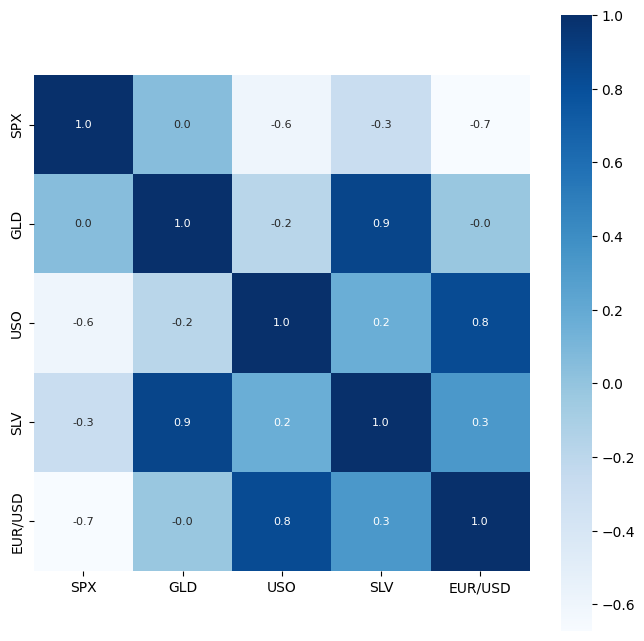

In [16]:
#construct heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
#correlation valued of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


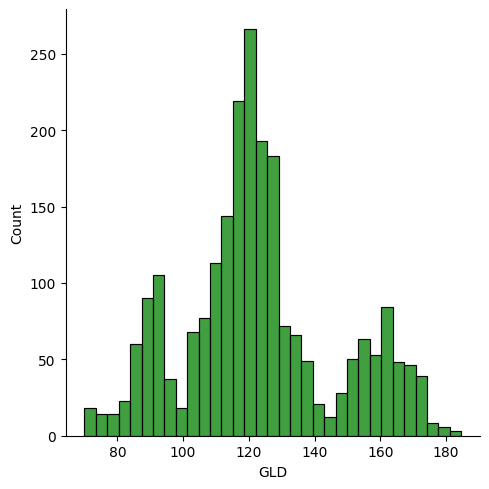

In [18]:
#check the distribution of gold price
sns.displot(gold_data['GLD'],color='green')

Splitting features and target

In [19]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [20]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [25]:
#Model Training
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
#Model Evaluation
test_data_pred=regressor.predict(X_test)
print(test_data_pred)

[168.51259948  81.84849992 115.90800012 127.70870082 120.53160144
 154.60089795 150.30179839 126.08360036 117.42949883 125.90170087
 116.49280097 171.89900117 141.15499824 167.82219846 115.12760041
 117.77160051 139.11850312 169.93890055 158.67340248 158.37319968
 155.19990016 125.15410033 175.29730036 157.5009038  125.21390034
  93.84659948  78.31969995 120.6734002  119.08919954 167.52090024
  87.94650011 125.19500002  91.14500104 117.73300033 121.08219876
 136.24850068 115.68730087 115.1951009  148.1153003  107.12520064
 104.29400242  87.11809772 126.50390051 117.88320019 154.15319858
 119.48190037 108.46639976 107.97419822  93.27700058 127.21049729
  75.42880006 113.6439992  121.30759981 111.25519939 118.93349893
 120.81109936 159.28350072 167.22000106 147.24539686  85.63909845
  94.42730026  86.82559864  90.61609992 118.87890079 126.32890082
 127.51320021 168.94029977 122.19509933 117.29299905  98.54059985
 167.51740072 143.25639809 132.43030233 121.24100242 121.41909927
 119.73500

In [27]:
#R square error
error_score=metrics.r2_score(Y_test,test_data_pred)
print(error_score)

0.989127429250037


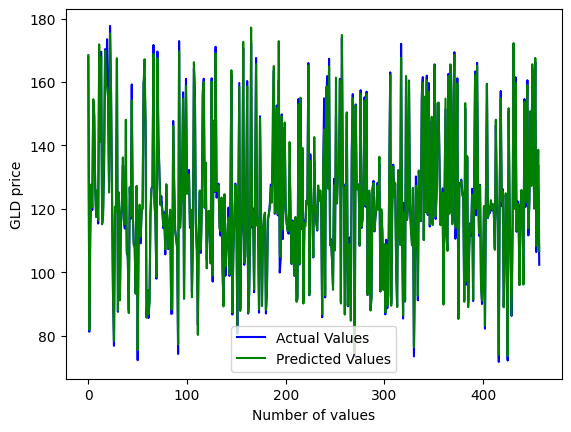

In [28]:
# Compare actual and predicted by plot
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data_pred,color='green',label='Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()
